In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

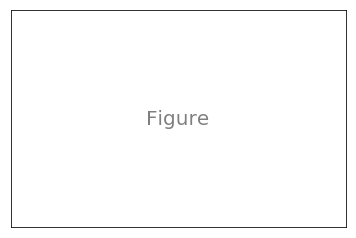

In [2]:
plt.figure()
plt.text( 0.5, 0.5, 'Figure', ha='center', va='center', size=20, alpha=.5 )
plt.xticks([]), plt.yticks([])
plt.show()

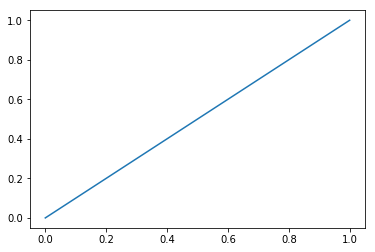

In [3]:
plt.figure()
plt.plot([0,1], [0,1])
plt.show()

Text(0.5, 0.5, '2')

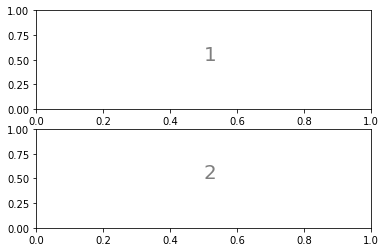

In [5]:
plt.subplot(2, 1, 1)
plt.text(0.5, 0.5, '1', size=20, alpha=.5)
plt.subplot(2, 1, 2)
plt.text(0.5, 0.5, '2', size=20, alpha=.5)

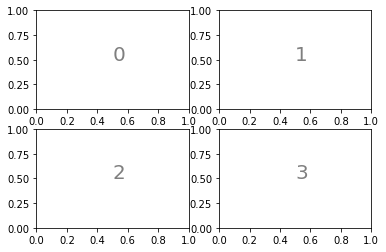

In [6]:
fig, axes = plt.subplots(2, 2)
for i, ax in enumerate(axes.flat):
    ax.text(0.5, 0.5, str(i), size=20, alpha=.5)
plt.show()

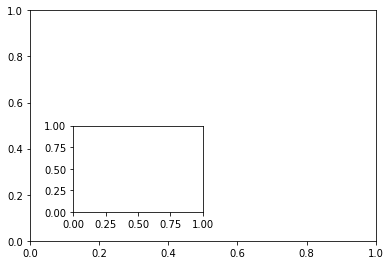

In [7]:
plt.axes([0.1, 0.1, 0.8, 0.8])
plt.axes([0.2, 0.2, 0.3, 0.3])

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('S&P500.csv', index_col=0, parse_dates=True, dayfirst=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


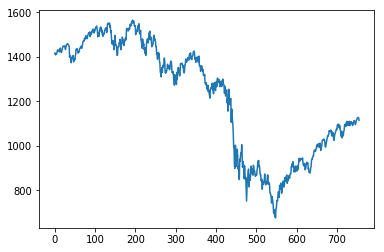

In [10]:
spx = data[['Adj Close']] .loc['2007-01-01':'2010-01-01']
plt.plot( spx.values )
plt.show()

In [11]:
plt.rcParams

C:\Users\lilanqing\Anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

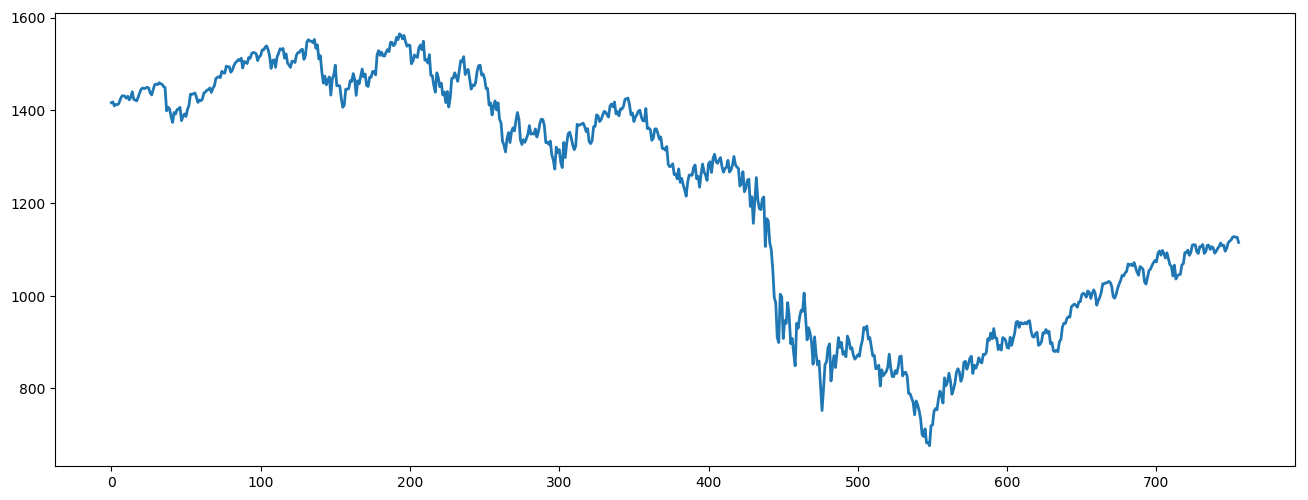

In [13]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot( spx.values, linewidth=2, linestyle='-')
plt.show()

C:\Users\lilanqing\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


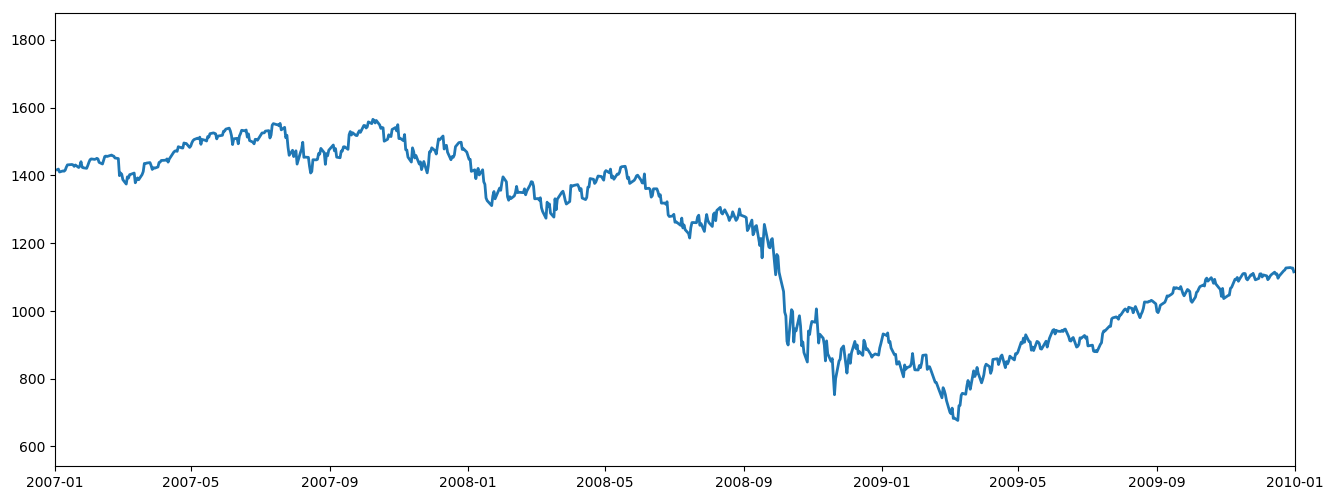

In [16]:
fig = plt.figure(figsize=(16,6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
x = spx.index
y = spx.values
ax.plot(x, y, linewidth=2, linestyle='-')
ax.set_xlim(['1/1/2007', '1/1/2010'])
ax.set_ylim(y.min()*0.8, y.max()*1.2)
fig.show()

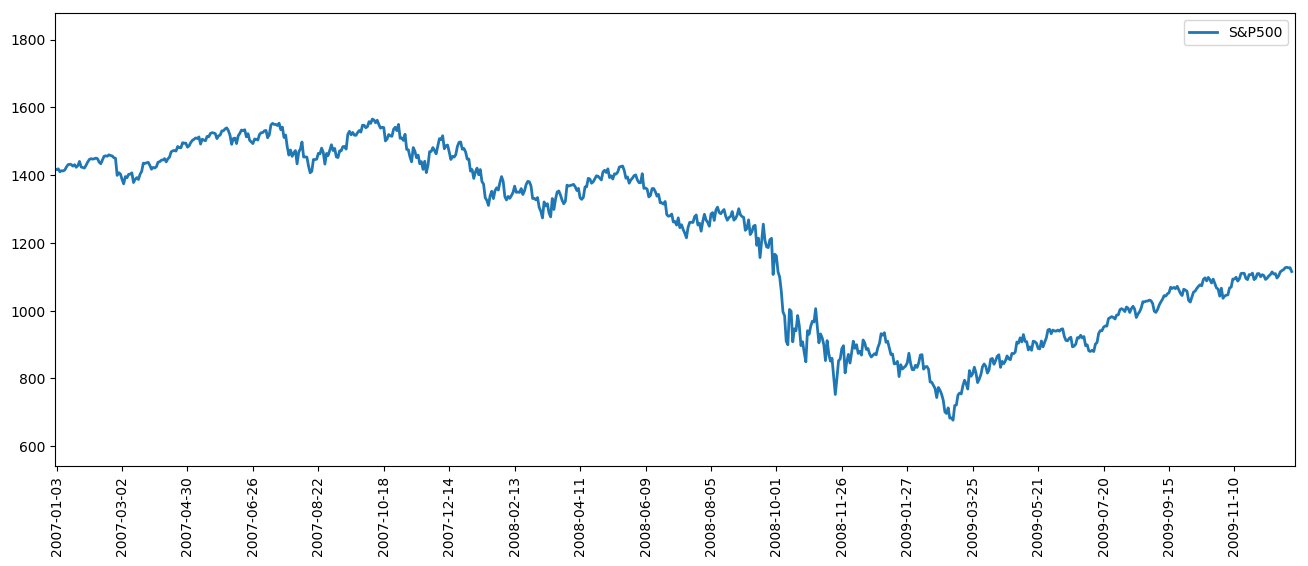

In [20]:
fig = plt.figure(figsize=(16,6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
x = spx.index
y = spx.values
ax.plot(y, linewidth=2, linestyle='-', label='S&P500')
ax.legend(loc=0, frameon=True)
ax.set_xlim(-1, len(x)+1)
ax.set_ylim(y.min()*0.8, y.max()*1.2)
ax.set_xticks(range(0, len(x), 40))
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()], rotation=90)
fig.show()


In [24]:
data = pd.read_csv( 'VIX.csv', index_col=0, parse_dates=True, dayfirst=True )
vix = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
vix.head()

,Adj Close
Date,
2007-01-03,12.04
2007-01-04,11.51
2007-01-05,12.14
2007-01-08,12.00
2007-01-09,11.91


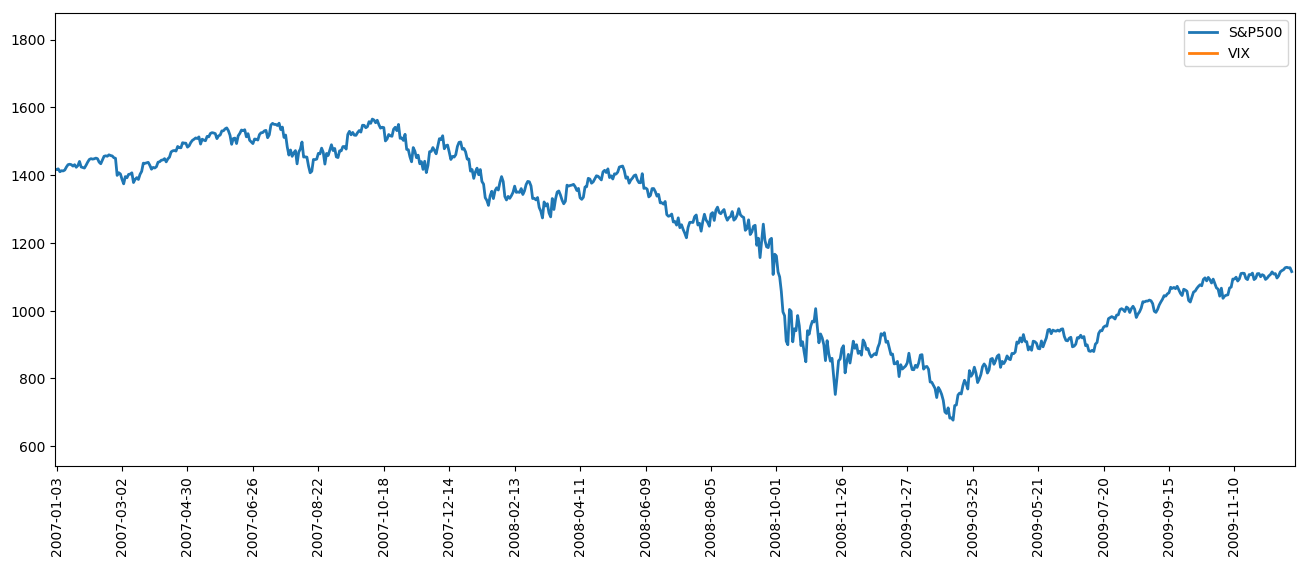

In [23]:
fig = plt.figure(figsize=(16,6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
x = spx.index
y1 = spx.values
y2 = vix.values
ax.plot(y1, linewidth=2, linestyle='-', label='S&P500')
ax.plot(y2, linewidth=2, linestyle='-', label='VIX')
ax.legend(loc=0, frameon=True)
ax.set_xlim(-1, len(x)+1)
ax.set_ylim(y.min()*0.8, y.max()*1.2)
ax.set_xticks(range(0, len(x), 40))
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()], rotation=90)
fig.show()

In [25]:
!pip install yahoofinancials

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Stored in directory: C:\Users\lilanqing\AppData\Local\pip\Cache\wheels\0e\b5\80\58f978ce55cd61ebe4b88f104de59bf859fda3a544898a9d03
Successfully built yahoofinancials


In [26]:
from yahoofinancials import YahooFinancials

In [27]:
start_date = '2018-04-29'
end_date = '2019-04-29'

stock_code = ['NVDA', "AMZN", "BABA", "FB", "AAPL"]
currency_code = ['EURUSD=X', 'JPY=X', 'CNY=X']

In [28]:
stock = YahooFinancials(stock_code)
currency = YahooFinancials(currency_code)

In [30]:
stock_daily = stock.get_historical_price_data(start_date, end_date, 'daily')
currency_daily = currency.get_historical_price_data(start_date, end_date, 'daily')

In [31]:
stock_daily

{'NVDA': {'eventsData': {'dividends': {'2018-05-23': {'amount': 0.15,
     'date': 1527082200,
     'formatted_date': '2018-05-23'},
    '2018-08-29': {'amount': 0.15,
     'date': 1535549400,
     'formatted_date': '2018-08-29'},
    '2018-11-29': {'amount': 0.16,
     'date': 1543501800,
     'formatted_date': '2018-11-29'},
    '2019-02-28': {'amount': 0.16,
     'date': 1551364200,
     'formatted_date': '2019-02-28'}}},
  'firstTradeDate': {'formatted_date': '1999-01-22', 'date': 916995600},
  'currency': 'USD',
  'instrumentType': 'EQUITY',
  'timeZone': {'gmtOffset': -18000},
  'prices': [{'date': 1525095000,
    'high': 229.0,
    'low': 224.1199951171875,
    'open': 226.99000549316406,
    'close': 224.89999389648438,
    'volume': 8196100,
    'adjclose': 223.70550537109375,
    'formatted_date': '2018-04-30'},
   {'date': 1525181400,
    'high': 227.25,
    'low': 222.1999969482422,
    'open': 224.57000732421875,
    'close': 227.13999938964844,
    'volume': 6344700,
    

In [34]:
def data_converter(price_data, code, asset):
    # convert raw data to dataframe
    if asset == 'FX':
        code = str(code[3:] if code[:3]=='USD' else code) + '=X'
    
    columns = ['open', 'close', 'low', 'high']
    price_dict = price_data[code]['prices']
    index = [p['formatted_date'] for p in price_dict]
    price = [[p[c] for c in columns] for p in price_dict]
    
    data = pd.DataFrame(price, index=pd.Index(index, name='date'), columns = pd.Index(columns, name='OHLC'))
    return data

In [35]:
EURUSD = data_converter( currency_daily, 'EURUSD', 'FX' )
EURUSD.head(3).append(EURUSD.tail(3))

OHLC,open,close,low,high
date,,,,
2018-04-29,1.212856,1.212283,1.206636,1.213857
2018-04-30,1.208313,1.208123,1.198351,1.208459
2018-05-01,1.199213,1.199156,1.195414,1.203109
2019-04-24,1.115698,1.115349,1.112174,1.116400
2019-04-25,1.113710,1.113685,1.112298,1.117281
2019-04-28,1.114902,1.115026,1.114554,1.116994


In [36]:
NVDA = data_converter( stock_daily, 'NVDA',' EQ' )
NVDA.head(3).append(NVDA.tail(3))

OHLC,open,close,low,high
date,,,,
2018-04-30,226.990005,224.899994,224.119995,229.000000
2018-05-01,224.570007,227.139999,222.199997,227.250000
2018-05-02,227.000000,226.309998,225.250000,228.800003
2019-04-24,191.089996,191.169998,188.639999,192.809998
2019-04-25,189.550003,186.910004,183.699997,190.449997
2019-04-26,180.710007,178.089996,173.300003,180.889999


In [37]:
p_NVDA = NVDA['close']

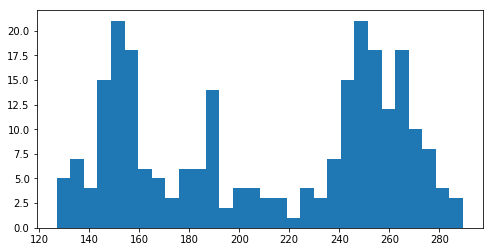

In [38]:
fig = plt.figure(figsize=(8, 4))
plt.hist(p_NVDA, bins=30)
plt.show()